In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle
from keras.src.models import Sequential
from sklearn.metrics import f1_score


# CNN #
### Load Data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_val = x_val.astype("float32") / 255

### Experiment
#### Number of Convolution

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3410 - loss: 1.8593 - val_accuracy: 0.4844 - val_loss: 1.4794
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5202 - loss: 1.3920 - val_accuracy: 0.5500 - val_loss: 1.3179
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5665 - loss: 1.2639 - val_accuracy: 0.5598 - val_loss: 1.2735
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5940 - loss: 1.1815 - val_accuracy: 0.5808 - val_loss: 1.2118
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6164 - loss: 1.1216 - val_accuracy: 0.5837 - val_loss: 1.2001
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.3289 - loss: 1.8403 - val_accuracy: 0.5159 - val_loss: 1.3536
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5430 - loss: 1.3021 - val_accuracy: 0.5783 - val_loss: 1.2052
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accura

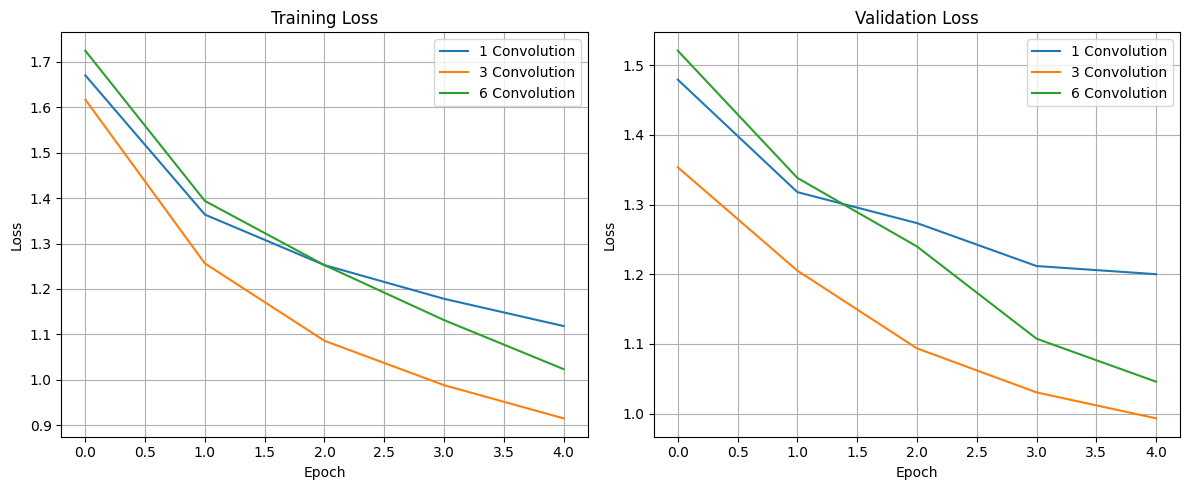

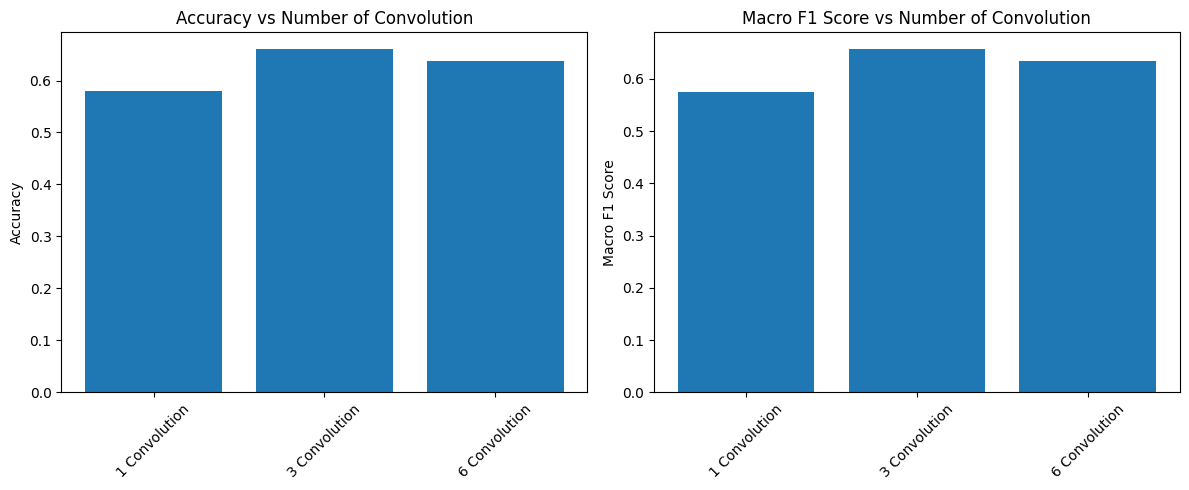

1 Convolution - Accuracy: 0.5789, Macro F1 Score: 0.5753
3 Convolution - Accuracy: 0.6597, Macro F1 Score: 0.6560
6 Convolution - Accuracy: 0.6378, Macro F1 Score: 0.6334


In [6]:
batch_size = 128
epochs = 5

conv = {
    "1 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ], 
    "3 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "6 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")

    ]
}



accuracy = []
train_loss = {}
val_loss = {}

f1_scores = []

for name, data in conv.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]

    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in conv.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Convolution")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Number of Convolution")
plt.ylabel("Macro F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# print f1 and accuracy each name
for name, acc, f1 in zip(conv.keys(), accuracy, f1_scores):
    print(f"{name} - Accuracy: {acc:.4f}, Macro F1 Score: {f1:.4f}")

### Number of Filter

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3465 - loss: 1.8520 - val_accuracy: 0.5147 - val_loss: 1.4172
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5266 - loss: 1.3651 - val_accuracy: 0.5281 - val_loss: 1.3423
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5696 - loss: 1.2429 - val_accuracy: 0.5702 - val_loss: 1.2517
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5972 - loss: 1.1737 - val_accuracy: 0.5859 - val_loss: 1.2008
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6128 - loss: 1.1253 - val_accuracy: 0.5914 - val_loss: 1.1757
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3626 - loss: 1.8069 - val_accuracy: 0.5343 - val_loss: 1.3572
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5519 - loss: 1.2932 - val_accuracy: 0.5765 - val_loss: 1.2415
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy:

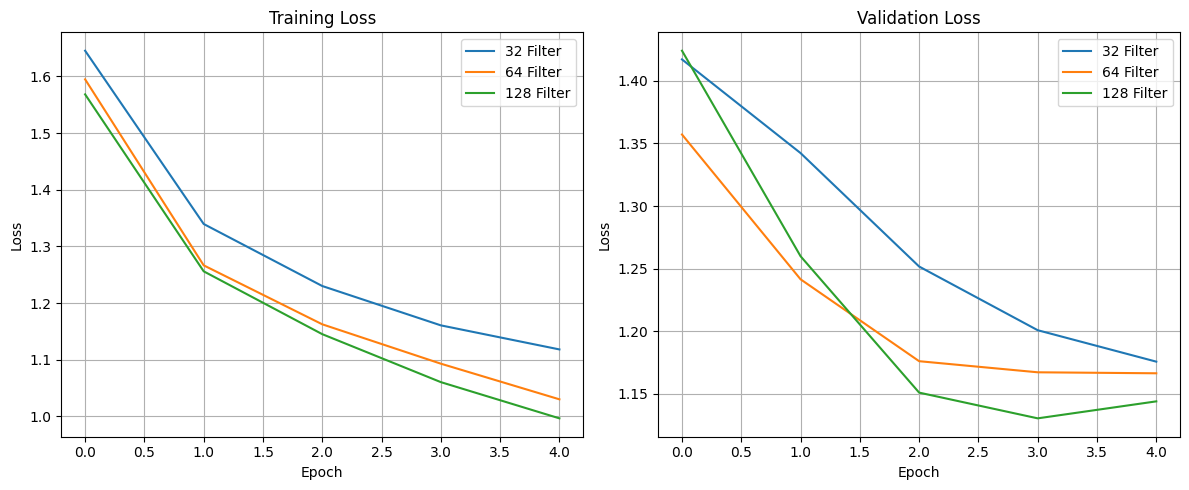

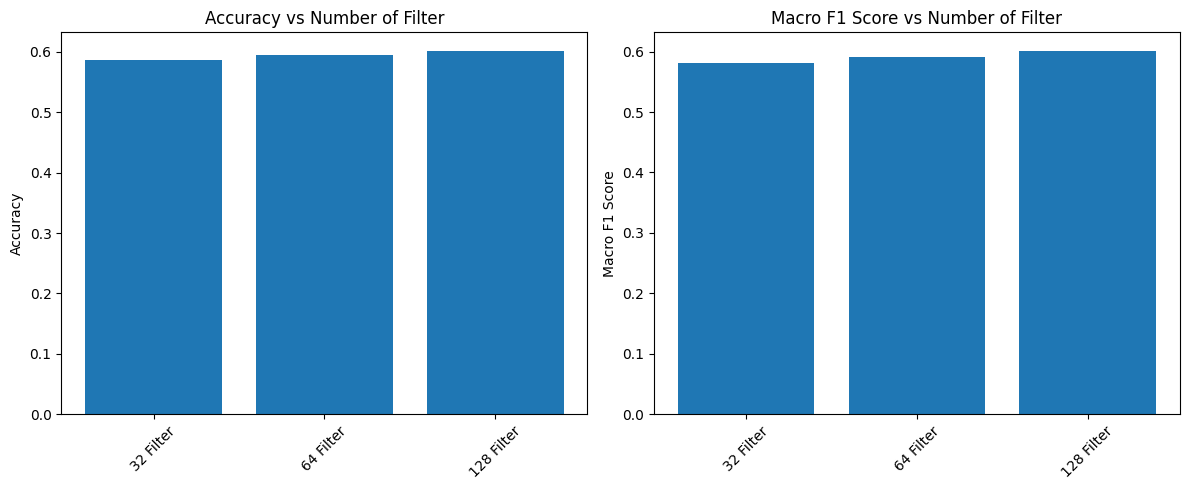

32 Filter - Accuracy: 0.5874, Macro F1 Score: 0.5819
64 Filter - Accuracy: 0.5943, Macro F1 Score: 0.5917
128 Filter - Accuracy: 0.6023, Macro F1 Score: 0.6018


In [10]:


num_of_fiter = {
    "32 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "64 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "128 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in num_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)
for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in num_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Filter")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Number of Filter")
plt.ylabel("Macro F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# print f1 and accuracy each name
for name, acc, f1 in zip(num_of_fiter.keys(), accuracy, f1_scores):
    print(f"{name} - Accuracy: {acc:.4f}, Macro F1 Score: {f1:.4f}")

### Size of Filter

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3345 - loss: 1.8730 - val_accuracy: 0.4914 - val_loss: 1.4756
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5185 - loss: 1.3883 - val_accuracy: 0.5464 - val_loss: 1.3215
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5678 - loss: 1.2563 - val_accuracy: 0.5546 - val_loss: 1.2724
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5980 - loss: 1.1750 - val_accuracy: 0.5913 - val_loss: 1.1920
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6146 - loss: 1.1194 - val_accuracy: 0.5879 - val_loss: 1.1899
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3002 - loss: 1.9344 - val_accuracy: 0.4604 - val_loss: 1.5411
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4716 - loss: 1.4924 - val_accuracy: 0.4860 - val_loss: 1.4561
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5

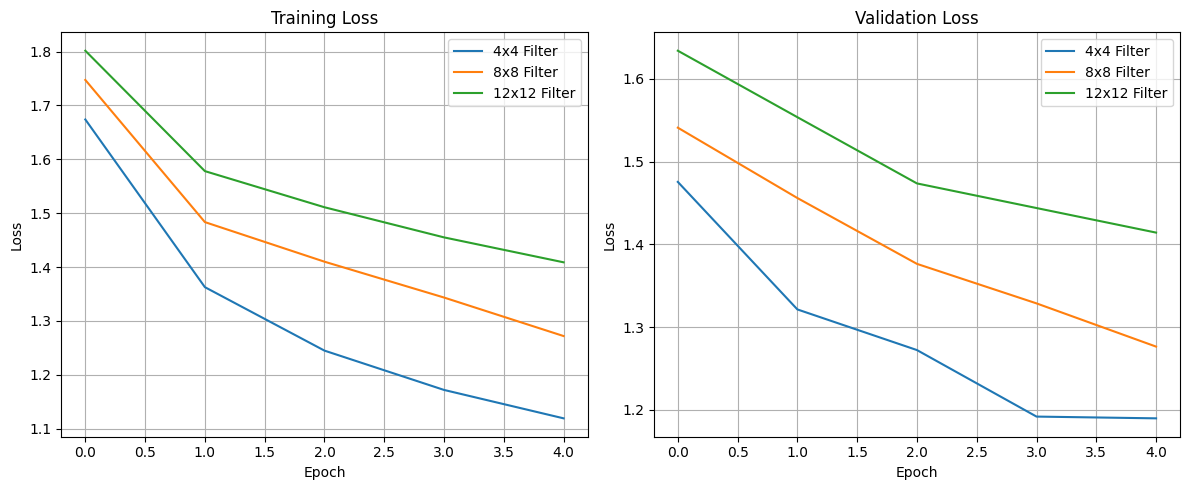

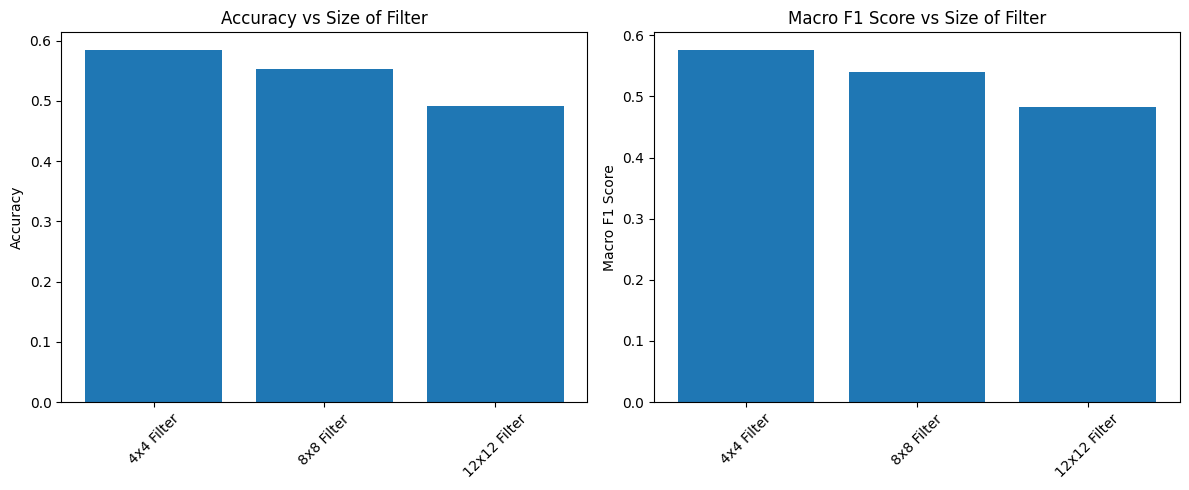

4x4 Filter - Accuracy: 0.5847, Macro F1 Score: 0.5760
8x8 Filter - Accuracy: 0.5525, Macro F1 Score: 0.5393
12x12 Filter - Accuracy: 0.4922, Macro F1 Score: 0.4829


In [12]:
size_of_fiter = {
    "4x4 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "8x8 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(8, 8), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "12x12 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(12, 12), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in size_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1]) 
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in size_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Size of Filter")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Size of Filter")
plt.ylabel("Macro F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print f1 and accuracy each name
for name, acc, f1 in zip(size_of_fiter.keys(), accuracy, f1_scores):
    print(f"{name} - Accuracy: {acc:.4f}, Macro F1 Score: {f1:.4f}")

### Variance of Pooling

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3523 - loss: 1.8368 - val_accuracy: 0.4998 - val_loss: 1.4363
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5190 - loss: 1.3731 - val_accuracy: 0.5482 - val_loss: 1.3178
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5620 - loss: 1.2571 - val_accuracy: 0.5651 - val_loss: 1.2566
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5874 - loss: 1.1932 - val_accuracy: 0.5726 - val_loss: 1.2332
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6033 - loss: 1.1431 - val_accuracy: 0.5945 - val_loss: 1.1888
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3178 - loss: 1.9013 - val_accuracy: 0.4563 - val_loss: 1.5343
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4824 - loss: 1.4733 - val_accuracy: 0.5116 - val_loss: 1.4050
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0

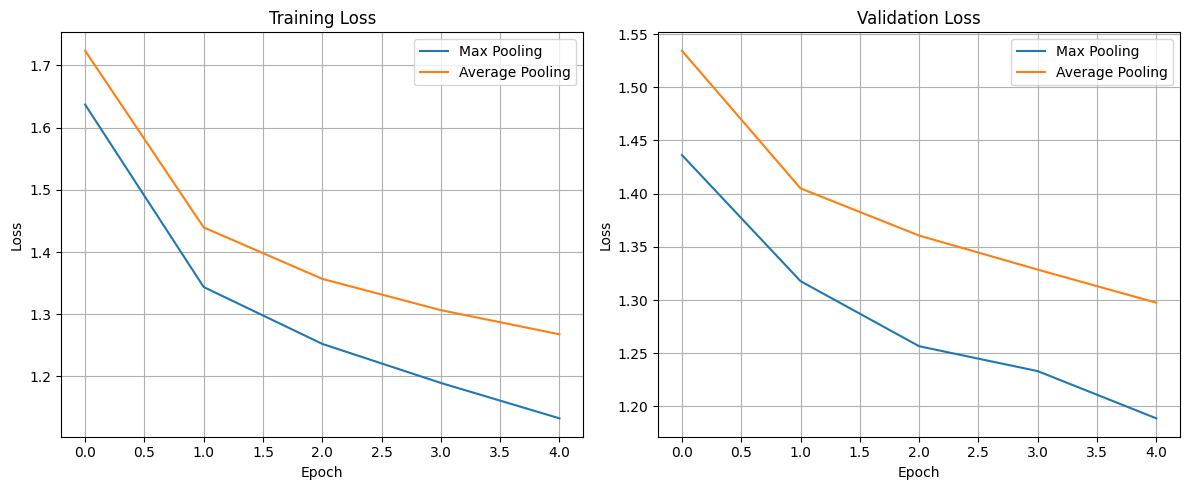

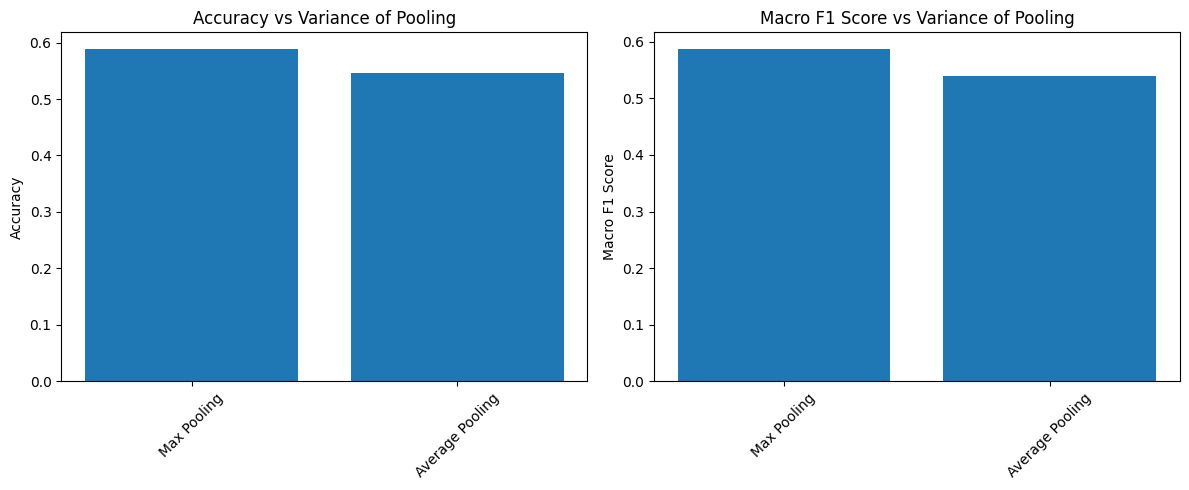

Max Pooling - Accuracy: 0.5887, Macro F1 Score: 0.5875
Average Pooling - Accuracy: 0.5458, Macro F1 Score: 0.5403


In [15]:
variance_of_pooling = {
    "Max Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ],
    "Average Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}
f1_scores = []

for name, data in variance_of_pooling.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  
    
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    f1 = f1_score(y_test.flatten(), y_pred_classes, average='macro')
    f1_scores.append(f1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in variance_of_pooling.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Variance of Pooling")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()


plt.subplot(1, 2, 2)
plt.bar(names, f1_scores)
plt.title("Macro F1 Score vs Variance of Pooling")
plt.ylabel("Macro F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print f1 and accuracy each name
for name, acc, f1 in zip(variance_of_pooling.keys(), accuracy, f1_scores):
    print(f"{name} - Accuracy: {acc:.4f}, Macro F1 Score: {f1:.4f}")

### Custom Forward CNN From Scratch

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3204 - loss: 1.9070 - val_accuracy: 0.4780 - val_loss: 1.4996
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5002 - loss: 1.4421 - val_accuracy: 0.5293 - val_loss: 1.3559
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5424 - loss: 1.3073 - val_accuracy: 0.5508 - val_loss: 1.2968
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5761 - loss: 1.2209 - val_accuracy: 0.5585 - val_loss: 1.2609
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5977 - loss: 1.1619 - val_accuracy: 0.5677 - val_loss: 1.2340
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


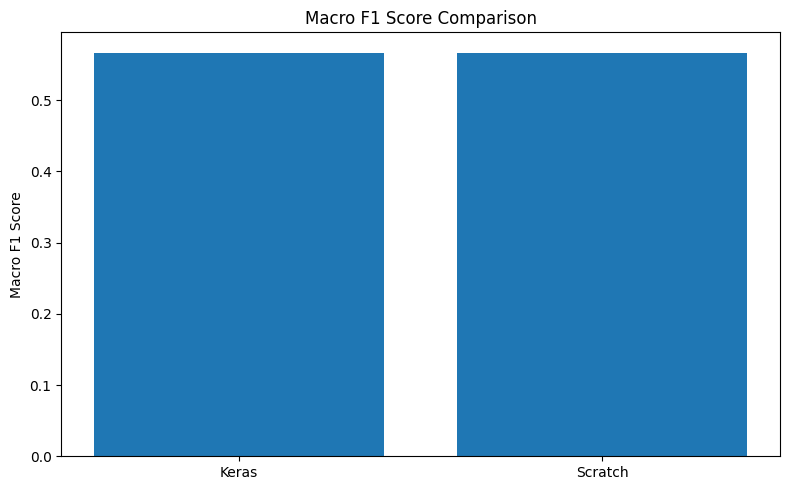

In [15]:
from src.cnn import CNNFromScratch

model = Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", name="conv2d"),
    layers.MaxPooling2D(pool_size=(2, 2), name="maxpooling2d"),
    layers.Flatten(name="flatten"),
    layers.Dense(num_classes, activation="softmax", name="dense")
])

model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, epochs=epochs,
                    validation_split=0.2
                    )

def save_model_for_cnn(model, save_path="../model/cnn.pkl"):
    """
    Save the weights of a Keras CNN model to a pickle file.
    :param model: 
    :param save_path: 
    :return: 
    """
    
    weights_dict = {}
    for layer in model.layers:
        if layer.weights:
            layer_name = layer.name
            if isinstance(layer, (layers.Conv2D, layers.Dense)):
                weights_dict[f"{layer_name}/kernel"] = layer.weights[0].numpy()
                if len(layer.weights) > 1:
                    weights_dict[f"{layer_name}/bias"] = layer.weights[1].numpy()
    
    with open(save_path, 'wb') as f:
        pickle.dump(weights_dict, f)

save_model_for_cnn(model)

# Initialize and configure CNNFromScratch make layers same as Keras model
CNNCustom = CNNFromScratch("../model/cnn.pkl")
CNNCustom.add_layer("conv2d", name="conv2d", filters=32, kernel_size=(3, 3), activation="relu")
CNNCustom.add_layer("maxpooling2d", name="maxpooling2d", pool_size=(2, 2))
CNNCustom.add_layer("flatten", name="flatten")
CNNCustom.add_layer("dense", name="dense", units=num_classes, activation="softmax")


keras_pred = np.argmax(model.predict(x_test), axis=1)
keras_f1 = f1_score(y_test, keras_pred, average='macro')
scratch_pred = np.argmax(CNNCustom.predict(x_test), axis=1)
scratch_f1 = f1_score(y_test, scratch_pred, average='macro')

plt.figure(figsize=(8, 5))
plt.bar(["Keras", "Scratch"], [keras_f1, scratch_f1])
plt.title("Macro F1 Score Comparison")
plt.ylabel("Macro F1 Score")
plt.tight_layout()
plt.show()

print(f"Macro F1 Score Keras: {keras_f1:.4f}, Scratch: {scratch_f1:.4f}")